## K-Means Clustering


### Create Random Data Set

In the last few weeks, we've studied classifiers - KNN, Naive Bayes, Logistic Regression, and SVMs. These are algorithms that are trainined on a dataset and are then tasked with accurately "classifying" a new data point with the appropriate label. 

Kmeans is in a different class of algorithms, called clustering. It is an unsupervised approach meaning that it is not presented with labels. Instead it is presented with a dataset and it is tasked with finding the clusters inherent in the data.

Assignment: generate a series of 80 data points in 2 dimensions (x,y) with the following properties:

- there should be 4 clusters of points
- each cluster should be formed by points whose coordinates come from a 2D gaussian
- the 2D gaussians should have the following centers:
- [1,1] , [1,3], [3,1], [3,3]
- they should have variance of 0.1, and 0 covariance

np.random.multivariate takes 3 parameters:
- mean
- covariance
- number of samples

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In the Code below, np.random.multivariate_normal samples from a gaussian distribution to generate a collection of points. Let's first get comfortable with sampling from a distrubtion. 


In [22]:
sample = np.random.multivariate_normal([1,1],[[.1,0],[0,.1]],20)
a = np.random.multivariate_normal([1,1],[[.1,0],[0,.1]],20)
b = np.random.multivariate_normal([1,3],[[.1,0],[0,.1]],20)
c = np.random.multivariate_normal([3,1],[[.1,0],[0,.1]],20)
d = np.random.multivariate_normal([3,3],[[.1,0],[0,.1]],20)


/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


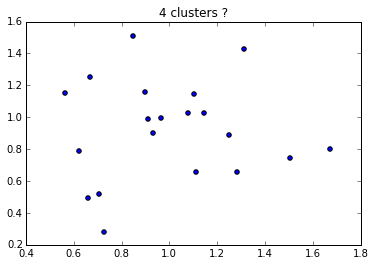

In [3]:
plt.scatter(sample[:,0], sample[:,1])
plt.title('4 clusters ?')
plt.show()

Now let's create our clusters .... `np.vstack()` will concatenate your 4 distributions together, so add your calls to `multivariate_normal()` within it.

In [14]:
# Add 4 2D gaussians with the characteristics above
data = np.vstack([a, b, c, d])

In [24]:
data[:10]

array([[ 0.9653447 ,  1.16511033],
       [ 1.38045374,  1.26236117],
       [ 0.85237181,  1.11615516],
       [ 1.49486525,  0.75234218],
       [ 0.91745173,  0.31336975],
       [ 0.78476608,  1.02036412],
       [ 0.79371018,  0.91869697],
       [ 0.70983206,  1.2632403 ],
       [ 0.26698045,  0.9758501 ],
       [ 0.29151075,  1.17141513]])

Plot the points

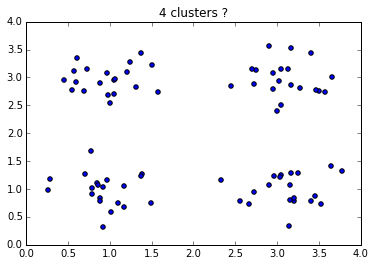

In [17]:
plt.scatter(data[:,0], data[:,1])
plt.title('4 clusters ?')
plt.show()

### Load the KMeans Class from sklearn.cluster

In [18]:
from sklearn.cluster import KMeans

Initialize a KMeans classifier called `km` with 4 cluster, random initialization, random_state=1, 1 initial centroid seed and maximum number of iterations equal to 1

In [20]:
km = KMeans(n_clusters=4, init='random', n_init=1, max_iter=1, random_state=1)

Train the classifier on all the data

In [27]:
km.fit(data)

KMeans(copy_x=True, init='random', max_iter=1, n_clusters=4, n_init=1,
    n_jobs=1, precompute_distances='auto', random_state=1, tol=0.0001,
    verbose=0)

Extract the coordinates of the cluster centers by retrieving `cluster_centers_` from `km`, store this as `centroids`

In [30]:
centroids = km.cluster_centers_
print centroids

[[ 2.93135239  3.16683955]
 [ 1.0738366   3.03338269]
 [ 0.87572417  1.34295581]
 [ 3.17142631  1.53878039]]


Predict the clusters for each data point, store this as `y`

In [32]:
y = km.predict(data)
print y

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]


Plot the points with a different color for each cluster. Plot also the centroids in Red.  Take note of the syntax here, we're explicitly specifying the marker types and colors in our plots (useful for the future perhaps).

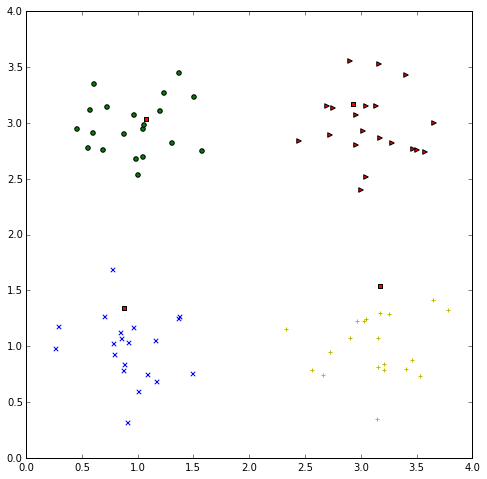

In [33]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
for t,marker,c in zip(xrange(4),">ox+","rgby") :
    ax.scatter(data[y == t,0],
                data[y == t,1],
                marker=marker,
                c=c)

ax.scatter(centroids[:,0],centroids[:,1],marker = 's',c='r')

#### Discussion: what do you see?

Let's try with better parameters. Initialize a KMeans classifier with 4 clusters, improved initialization, 10 initial centroid seeds and maximum number of iterations equal to 300.

In [35]:
km = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=1)

Condense the steps above in a handy function that receives the data and the classifier as input parameters and returns the figure. Make sure you are aware of the number of clusters

In [36]:
def do_kmeans_4(km, data):
    km.fit(data)
    centroids = km.cluster_centers_
    print "centroids:", centroids
    y = km.predict(data)
    
    
    fig, ax = plt.subplots(1,1, figsize=(8,8))
    for t,marker,c in zip(xrange(4),">ox+","rgby") :
        ax.scatter(data[y == t,0],
                   data[y == t,1],
                   marker=marker,
                   c=c)

    ax.scatter(centroids[:,0],centroids[:,1],marker = 's',c='r')

centroids: [[ 1.0315119   2.8874012 ]
 [ 1.00009424  1.00532644]
 [ 2.96299762  2.9531573 ]
 [ 2.90707023  0.89317487]]


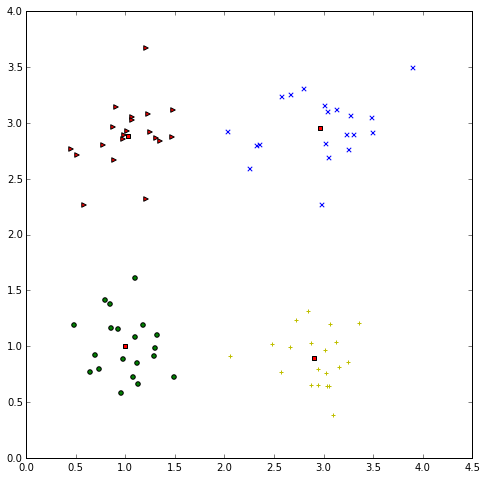

In [15]:
do_kmeans_4(km, data)

### Blurred boundaries

Generate new datapoints that have a bigger variance of 0.5, around the same centroids using the same process you did above.  Store these in `data1`.  Plot the results in a scatter plot.

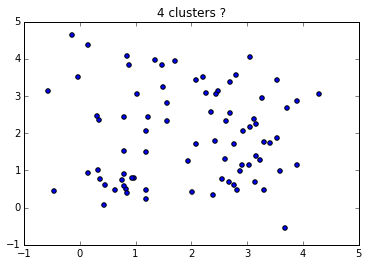

In [37]:
a = np.random.multivariate_normal([1,1],[[.5,0],[0,.5]],20)
b = np.random.multivariate_normal([1,3],[[.5,0],[0,.5]],20)
c = np.random.multivariate_normal([3,1],[[.5,0],[0,.5]],20)
d = np.random.multivariate_normal([3,3],[[.5,0],[0,.5]],20)
data1 = np.vstack([a, b, c, d])
plt.scatter(data1[:,0], data1[:,1])
plt.title('4 clusters ?')
plt.show()

Initialize a new kmeans classifier

In [38]:
km = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=1)

Use the previously defined function `do_kmeans_4` to fit and plot the new data

centroids: [[ 0.84817849  3.24915453]
 [ 0.67745273  0.7087187 ]
 [ 2.92091436  1.04705468]
 [ 2.93245043  2.92407027]]


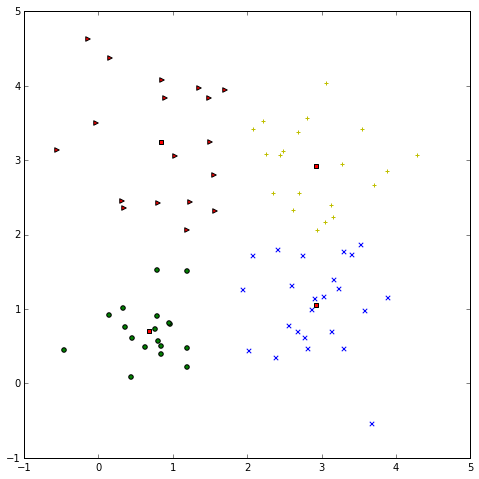

In [39]:
do_kmeans_4(km, data1)

Repeat the above with 150 points per cluster

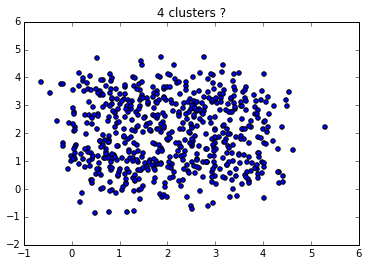

In [43]:
a = np.random.multivariate_normal([1,1],[[.5,0],[0,.5]],150)
b = np.random.multivariate_normal([1,3],[[.5,0],[0,.5]],150)
c = np.random.multivariate_normal([3,1],[[.5,0],[0,.5]],150)
d = np.random.multivariate_normal([3,3],[[.5,0],[0,.5]],150)
data2 = np.vstack([a, b, c, d])
plt.scatter(data2[:,0], data2[:,1])
plt.title('4 clusters ?')
plt.show()


centroids: [[ 3.14671576  2.81558304]
 [ 0.92988407  0.88522784]
 [ 0.92367981  3.07912566]
 [ 3.0425307   0.81717676]]


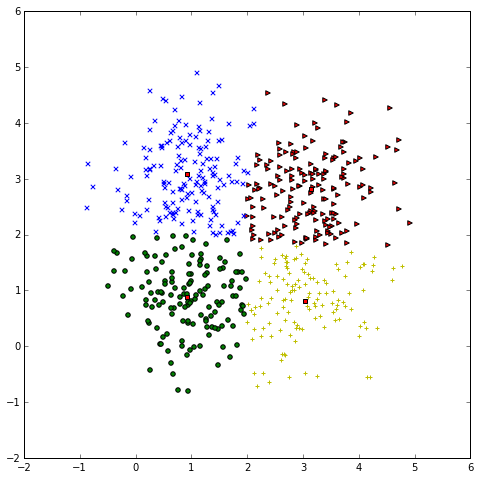

In [42]:
km2 = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=1)
do_kmeans_4(km2, data2)

#### Discussion: what do you see?

## Let's find clusters in the Iris Dataset

Import the data from the iris dataset in sklearn, generate X and y arrays from the `data` and `target` attributes.  Also store the `target_names` attribute into a variable called `target_names`

In [44]:
from sklearn import datasets


Display the features names

In [69]:
iris = datasets.load_iris()
print iris.feature_names
X = iris.data
print X[:, 1]
print iris.target_names



['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[ 3.5  3.   3.2  3.1  3.6  3.9  3.4  3.4  2.9  3.1  3.7  3.4  3.   3.   4.
  4.4  3.9  3.5  3.8  3.8  3.4  3.7  3.6  3.3  3.4  3.   3.4  3.5  3.4  3.2
  3.1  3.4  4.1  4.2  3.1  3.2  3.5  3.1  3.   3.4  3.5  2.3  3.2  3.5  3.8
  3.   3.8  3.2  3.7  3.3  3.2  3.2  3.1  2.3  2.8  2.8  3.3  2.4  2.9  2.7
  2.   3.   2.2  2.9  2.9  3.1  3.   2.7  2.2  2.5  3.2  2.8  2.5  2.8  2.9
  3.   2.8  3.   2.9  2.6  2.4  2.4  2.7  2.7  3.   3.4  3.1  2.3  3.   2.5
  2.6  3.   2.6  2.3  2.7  3.   2.9  2.9  2.5  2.8  3.3  2.7  3.   2.9  3.
  3.   2.5  2.9  2.5  3.6  3.2  2.7  3.   2.5  2.8  3.2  3.   3.8  2.6  2.2
  3.2  2.8  2.8  2.7  3.3  3.2  2.8  3.   2.8  3.   2.8  3.8  2.8  2.8  2.6
  3.   3.4  3.1  3.   3.1  3.1  3.1  2.7  3.2  3.3  3.   2.5  3.   3.4  3. ]
['setosa' 'versicolor' 'virginica']


Plot the Sepal width versus Petal Width with colors according to species.  Use the same syntax for specifying marker colors and types that we did above but this time try to add a 4th parameter in the zip function, the target_names parameter and use this as the `label` parameter for each scatter plot.

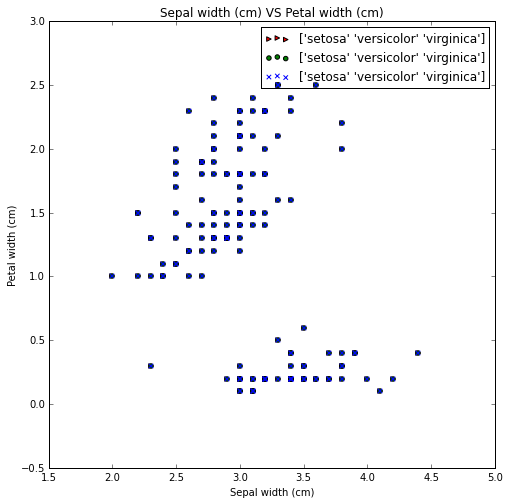

In [71]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
# Generate the plot like above
for t,marker,c, label in zip(xrange(4),">ox+","rgby", iris.target_names ) :
    ax.scatter(X[:, 1], X[:, 3], marker=marker, c=c, label=iris.target_names)

plt.xlabel('Sepal width (cm)')
plt.ylabel('Petal width (cm)')
plt.title('Sepal width (cm) VS Petal width (cm)')
plt.legend(loc='best')
plt.show()

### Exercise 1: Implement Kmeans on Iris Data Set
Even though the Iris Data Set has labels, the Kmeans algorithms will not take these labels as input. So we'll see how well it does at figuring out these labels on its own

### Using 3 clusters, fit and and predict using Kmeans

In [24]:
from sklearn.datasets import load_iris
# Load in iris

In [25]:
# Instantiate KMeans

In [ ]:
# Fit and Predict

In [27]:
# Print the resulting labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

Now try and generate 2 plots side-by-side.  On the first, the true clusters (classes) and on the second, the predicted clusters.  The code for the 2 should be almost identical, make use of the work from above.

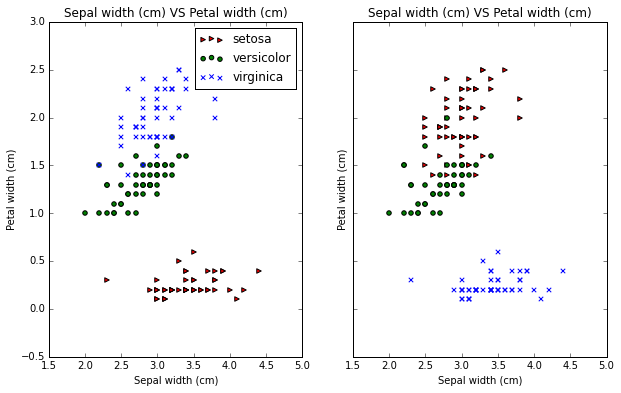

In [28]:
fig, (ax1, ax2) = plt.subplots( 1,2, figsize=(10,6), sharex=True, sharey=True)

## first the true clusters

    
## second the k-means clusters


ax1.set_xlabel('Sepal width (cm)')
ax1.set_ylabel('Petal width (cm)')
ax1.set_title('Sepal width (cm) VS Petal width (cm)')
ax1.legend(loc='best')

ax2.set_xlabel('Sepal width (cm)')
ax2.set_ylabel('Petal width (cm)')
ax2.set_title('Sepal width (cm) VS Petal width (cm)')

#### How well does Kmeans perform?
#### What are the pros and cons of unsupervised learning?

### Exercise 2: Silhouette Scores

### Silhouette score
Silhouette score is one way of evaluating how good your clustering has done.  It can be a means of validation, in which you can try out different values of the parameters (namely **k**), and choose the value that results in the best silhouette score.

Use `sklearn.metrics.silhouette_score()` on the initial dataset and the predicted clusters with a 'euclidean' distance metric to print out the silhouette score for k=3.

In [51]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances


0.5525919445213674

### calculate the Silhouette score for the values of k between 2-10

In [52]:
# use a for loop to generate values of k, fit and label data, append the scores to a list, and print the scores


0.680813620271
0.552591944521
0.49722797263
0.488517550854
0.371218050256
0.353677304626
0.350588885503
0.332967161846


Do you notice anything?  How many clusters would you have chosen in this example without knowing the right answer beforehand?  Is this the right number?  Can you see anything in the plots that suggests why you (may) have gotten the wrong answer?

### Exercise 3: Create your own Sum of Squared Errors function

In [53]:
# reseting the labels to 3 clusters 
k_num = 3
km = KMeans(n_clusters=k_num, random_state=1)
km.fit(X)
labels = km.labels_

# start by calculating the mean for each cluster
# you can check your answer with 
km.cluster_centers_

def get_cluster_centers(X, labels, k_num):
    CC_list = []
    for k in range(k_num):
        # get the mean coordinates of each cluster
        CC_list.append(np.mean(X[labels == k], axis = 0))
    return CC_list

# for each cluster substract the mean from each data point to get the error
# then get the magnitude of each error, square it, and sum it
def get_SSE(X, labels):
    k_num = len(np.unique(labels))
    CC_list = get_cluster_centers(X, labels, k_num)
    CSEs = []
    for k in range(k_num):
        # for each cluster of k we get the coordinates of how far off each point is to the cluster
        error_cords = X[labels == k] - CC_list[k]
        # square the coordinates and sum to get the magnitude squared
        error_cords_sq = error_cords ** 2
        error_mag_sq = np.sum(error_cords_sq, axis = 1)
        # since we already have the magnitude of the error squared we can just take the sum for the cluster
        CSE = np.sum(error_mag_sq)
        CSEs.append(CSE)
    # sum each cluster's sum of squared errors
    return sum(CSEs)

In [54]:
# similar to the loop before
# generate values of k, fit and label data, append Sum of Squared Errors scores to a list, and print the scores

SSEs = []
Sil_coefs = []
for k in range(2,10):
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(X)
    labels = km.labels_
    Sil_coefs.append(metrics.silhouette_score(X, labels, metric='euclidean'))
    SSEs.append(get_SSE(X, labels))

### Exercise 4: Plot the SSE score next to the Silhouette scores

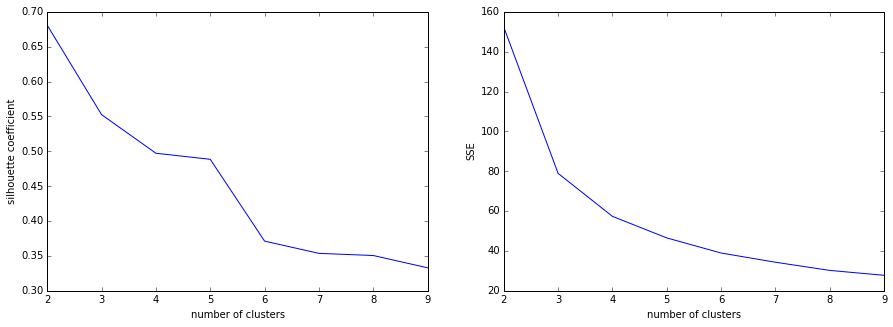

In [55]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5), sharex=True)
k_clusters = range(2,10)
ax1.plot(k_clusters, Sil_coefs)
ax1.set_xlabel('number of clusters')
ax1.set_ylabel('silhouette coefficient')

# plot here on ax2
ax2.plot(k_clusters, SSEs)
ax2.set_xlabel('number of clusters')
ax2.set_ylabel('SSE');

What do you notice about the 2 plots?  Anything of interest?  Can you see and explain conceptually why the silhouette coefficient could be a useful measure in evaluation while SSE isn't complete?

###Exercise: Clustering Handwritten Digits
Let's try out somet of our clustering exercises on our digits dataset (the original MNIST dataset we used with KNN).

Let's first fetch the dataset from the internet (which may take a while, note the asterisk [*]):

In [29]:
from sklearn.datasets import fetch_mldata
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
X_digits, _,_, Y_digits = fetch_mldata("MNIST Original").values() # fetch dataset from internet
X_digits, Y_digits = shuffle(X_digits,Y_digits) # shuffle dataset (which is ordered!)
X_digits = X_digits[-5000:]       # take only the last instances, to shorten runtime of KMeans

Let's have a look at some of the instances in the dataset we just loaded:

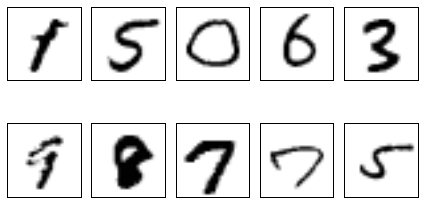

In [30]:
plt.rc("image", cmap="binary") # use black/white palette for plotting
for i in xrange(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_digits[i].reshape(28,28))
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()

Try creating a KMeans clusterer with 20 classes (obviously 10 would be ideal, but let's try 20 first).  Fit the model to the digits data.

Store the means of the clusters (the centroids) in a variable called `mu_digits` via a call to `cluster_centers_`:

Now let's take a look at those "mean digits".  What is going on here?

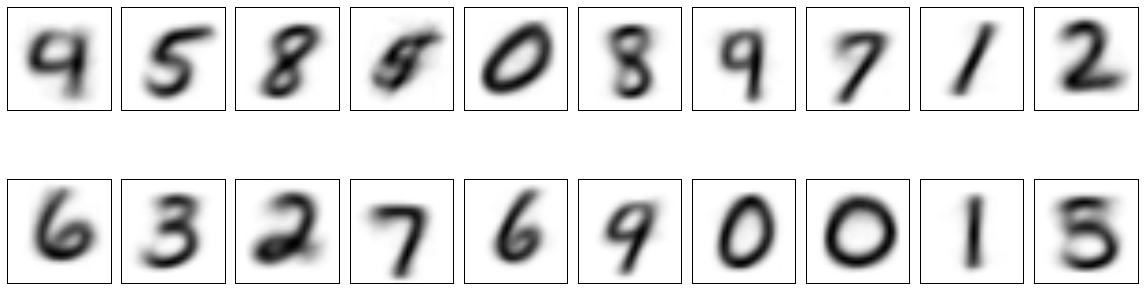

In [33]:
plt.figure(figsize=(16,6))
for i in xrange(2*(mu_digits.shape[0]/2)): # loop over all means
    plt.subplot(2,mu_digits.shape[0]/2,i+1)
    plt.imshow(mu_digits[i].reshape(28,28))
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()

Now that you've tried 20 clusters, let's see where the optimum is.  Try building a loop that tries out different values of k and stores the resulting silhouette coefficients.  What do you find the optimum k value to be?  Is it 10 as we might hope?

For further exploration, try some of the other clustering types provided by sklearn and see how they perform (via silhouette coefficient or another cluster evaluation metric provided by sklearn).

### Even Further Exploration
- Load in the SMS Spam Classification dataset that we used in the Naive Bayes Lecture
- Follow the same steps to "vectorize" the raw text data into feature vectors (based on TfidfVectorizer preferably)
- Run KMeans with whatever number of clusters you like (or other clustering algorithms)
- Select the best clustering results and examine them.  Print out the raw text for some of the documents in each cluster.  Are there patterns in the data?  Can you derive some intuition for why certain documents might've been grouped together?

Remember, clustering is most often used in the data exploration step, so this is the type of exercise you might frequently use clustering for, to find patterns in the data at a higher level of abstraction than having to examine every single record individually.